## ML Assignment 3

### Question : 
5) Download the COVID -19 data of India for the month of May, 2020 and design a predictor for the number of deaths on a particular day. Hence, predict the number of deaths on  April 20, 2020 and June 10th , 2020. Verify your prediction with the actual number of deaths and hence calculate the accuracy of prediction.

### i) Import headers and csv data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

df = pd.read_csv('india_covid19.csv')

### ii) Extracting Relevant Data for May 2020

In [2]:
may = df.loc[df['Date_reported'].str.match(r'..-05-2020')]
may = may[['Date_reported', ' New_deaths']]

may['Date_reported'] =  pd.to_datetime(may['Date_reported'], format='%d-%m-%Y')
may['Date_reported'] = may['Date_reported'].dt.day

### iii) Visualizing the date

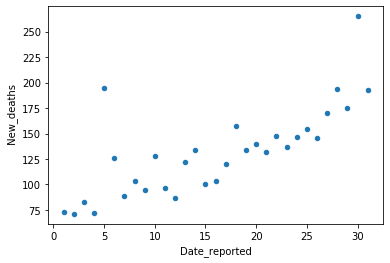

In [3]:
may.plot(x ='Date_reported', y=' New_deaths', kind = 'scatter')

### iv) Construction the Predictors

#### Initializinfg the constants

In [4]:
n = 22
X = may['Date_reported'].head(n)
Y = may[' New_deaths'].head(n)

X_val = may['Date_reported'].tail(9)
Y_val = may[' New_deaths'].tail(9)

### Finding w0 and w1 ( for Linear )

In [5]:
A = np.sum(X)
B = np.sum(Y)
C = np.sum(X*X)
D = np.sum(X*Y)

w0 = (A*D - C*B) / (A*A - n*C)
w1 = (A*B - n*D) / (A*A - n*C)

def H(x):
    return w0 + w1*x

### Finding w0, w1 and w2 ( for Quadratic )

In [6]:
Xmat = np.column_stack((np.ones(n), X, X*X))

W = np.dot(np.linalg.inv(np.dot(Xmat.T, Xmat)), np.dot(Xmat.T, Y))

def G(x):
    return W[0] + W[1]*x + W[2]*x*x

### v) Visualizing the hypothesis

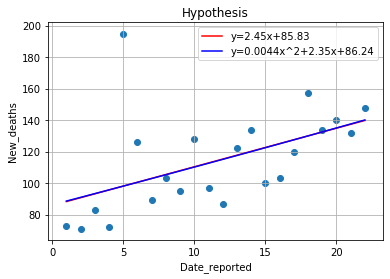

In [12]:
x = X
y = H(x)
y_ = np.dot(Xmat, W)
plt.plot(x, y, '-r', label='y='+"{:.2f}".format(w1)+'x+'+"{:.2f}".format(w0))
plt.plot(x, y_, '-b', label='y='+"{:.4f}".format(W[2])+'x^2+'+"{:.2f}".format(W[1])+'x+'+"{:.2f}".format(W[0]))
plt.scatter(X, Y)
plt.title('Hypothesis')
plt.legend(loc='upper right')
plt.xlabel("Date_reported")
plt.ylabel("New_deaths")
plt.grid()
plt.show()

### v) Mean Average Percentage Error (MAPE)

In [8]:
Y_predicted = H(X_val)

J = np.sum(np.abs(Y_predicted - Y_val)/Y_val)
percentage = round((J/9)**(1/2) * 100, 2)

print("percent error for linear =", percentage)

Y_predicted = W[0] + W[1]*X_val + W[2]*(X_val**2)

J = np.sum(np.abs(Y_predicted - Y_val)/Y_val)
percentage = round((J/9)**(1/2) * 100, 2)

print("percent error for Quadratic =", percentage)

percent error for linear = 34.87
percent error for Quadratic = 34.4


### Predicting April 20 and June 20 deaths

In [9]:
# April 20 - > x = -10
linr_apr = round(H(-10), 3)
quad_apr = round(G(-10), 3)

print("\t\tActual\t\tPrediction\t\tMonth")
print("Linear\t\t36" + "\t\t" +str(linr_apr) + "\t\t\tApril")
print("Quadratic\t36" + "\t\t" +str(quad_apr) + "\t\t\tApril")

# June 20 - > x = 51
linr_jun = round(H(51), 3)
quad_jun = round(G(51), 3)

print("Linear\t\t375" +  "\t\t" +str(linr_jun) + "\t\t\tJune")
print("Quadratic\t375" +  "\t\t" +str(quad_jun) + "\t\t\tJune")

		Actual		Prediction		Month
Linear		36		61.297			April
Quadratic	36		63.173			April
Linear		375		210.955			June
Quadratic	375		217.714			June
